In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
df = pd.read_csv('possum.csv')

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [7]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [8]:
num_cols = df[['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [9]:
# Unique values and their distribution
print("\nUnique Values and Distribution:")
for col in num_cols.columns:
    unique_values = num_cols[col].unique()
    num_unique = len(unique_values)  # Fixed typo here
    print(f"\nColumn: {col}")
    if num_unique > 20:
        # Calculate and print percentiles
        percentiles = np.percentile(num_cols[col], [25, 50, 75])
        print(f"  25th percentile: {percentiles[0]:.2f}")
        print(f"  50th percentile (median): {percentiles[1]:.2f}")
        print(f"  75th percentile: {percentiles[2]:.2f}")
    else:
        # Print value counts
        print(num_cols[col]
              .value_counts()
              .reset_index()
              .rename(columns={"index": col, col: "Count"})
              .to_markdown(index=False, numalign="left", stralign="left"))



Unique Values and Distribution:

Column: case
  25th percentile: 26.75
  50th percentile (median): 52.50
  75th percentile: 78.25

Column: site
| Count   | count   |
|:--------|:--------|
| 1       | 33      |
| 7       | 18      |
| 2       | 13      |
| 6       | 13      |
| 5       | 13      |
| 3       | 7       |
| 4       | 7       |

Column: age
| Count   | count   |
|:--------|:--------|
| 3       | 27      |
| 2       | 16      |
| 4       | 14      |
| 5       | 13      |
| 6       | 12      |
| 1       | 10      |
| 7       | 7       |
| 9       | 2       |
| 8       | 1       |

Column: hdlngth
  25th percentile: 90.67
  50th percentile (median): 92.80
  75th percentile: 94.72

Column: skullw
  25th percentile: 54.98
  50th percentile (median): 56.35
  75th percentile: 58.10

Column: totlngth
  25th percentile: 84.00
  50th percentile (median): 88.00
  75th percentile: 90.00

Column: taill
| Count   | count   |
|:--------|:--------|
| 38      | 21      |
| 36      | 13    

In [10]:
filtered_df = num_cols[['hdlngth', 'skullw', 'footlgth', 'earconch', 'eye', 'belly']]

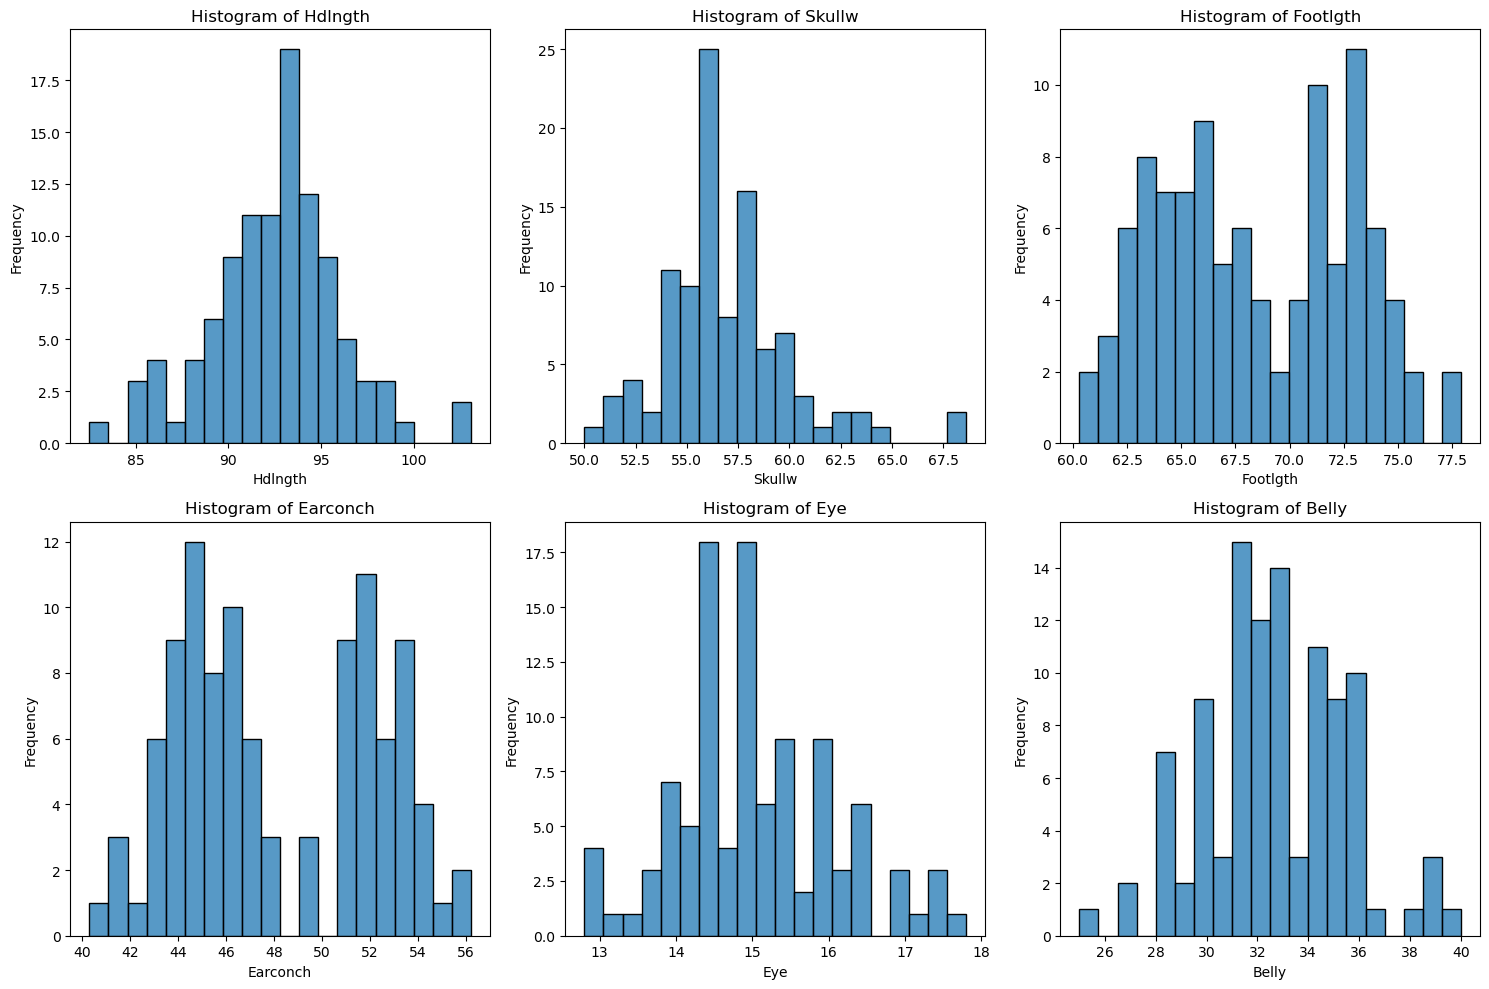

In [11]:
import seaborn as sns
# Create a figure with 3 rows and 3 columns (one plot per column)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for ax, col in zip(axes, filtered_df):
    sns.histplot(filtered_df[col], bins=20, kde=False, ax=ax)
    ax.set_title(f'Histogram of {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure
plt.savefig('possum_histograms.png')
plt.show()

In [12]:
barplot = df[['site', 'belly']]

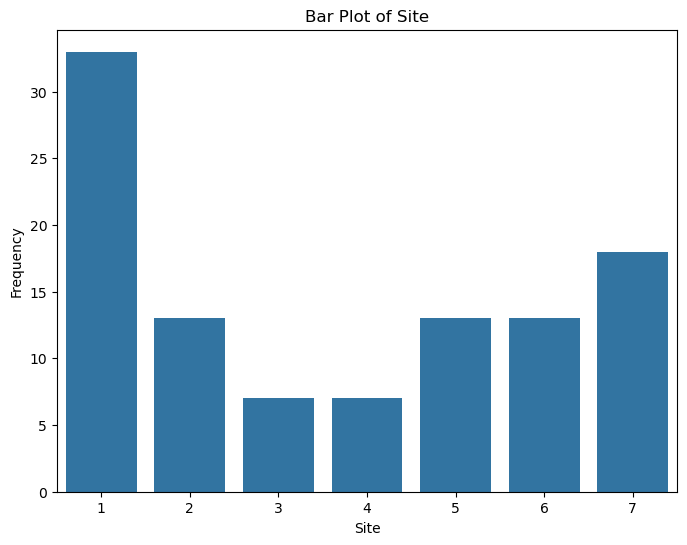

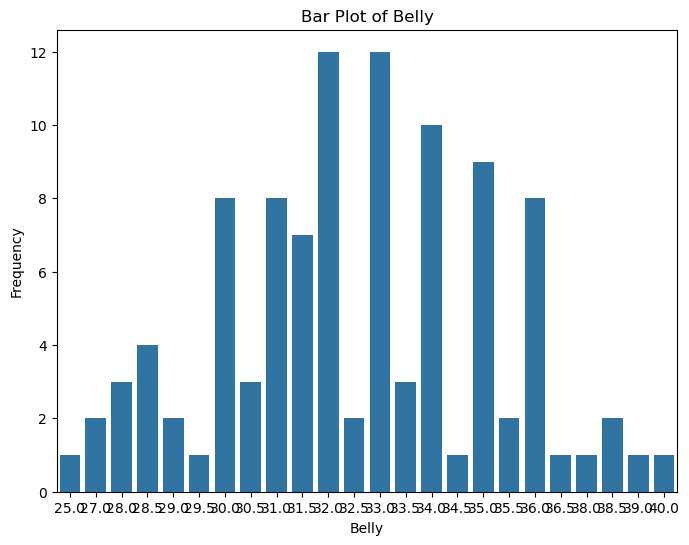

In [13]:
# seleted columns
ls = barplot

# Iterate over each column in the list and create a bar plot
for col in ls:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Bar Plot of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

In [14]:
num_cols.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

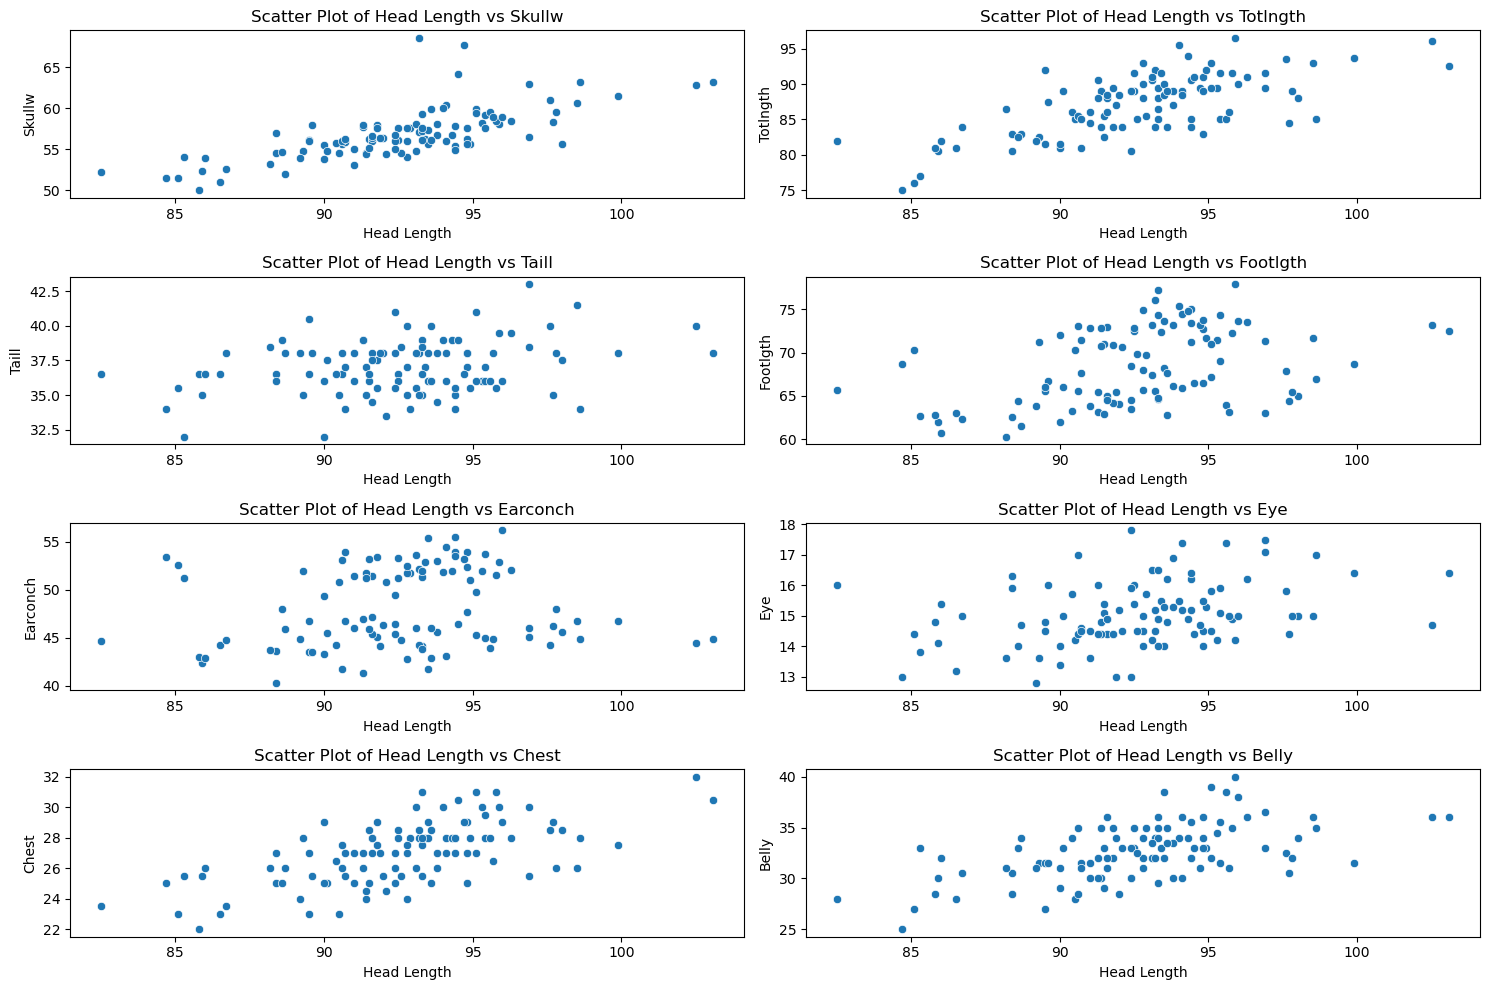

In [15]:
plot = df[['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']]

# List of columns to plot against 'hdlngth'
columns_to_plot = ['skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']



fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()


for ax, col in zip(axes, columns_to_plot):
    sns.scatterplot(data=plot, x='hdlngth', y=col, ax=ax)
    ax.set_title(f'Scatter Plot of Head Length vs {col.capitalize()}')
    ax.set_xlabel('Head Length')
    ax.set_ylabel(col.capitalize())

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Save the figure
plt.savefig('possum_scatter_plots.png')
plt.show()

In [16]:
correlation_matrix = plot.corr()
correlation_matrix

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


In [17]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [19]:
scaler = StandardScaler()
#scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
#scaled_numerical

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Pop', 'sex'], dtype='object')

In [21]:
cat_cols = ['Pop', 'sex']

In [22]:
df['sex'].unique()

array(['m', 'f'], dtype=object)

In [23]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [24]:
df['sex'] = df['sex'].map({'m':1, 'f':0})

In [25]:
df['Pop'] = df['Pop'].map({'Vic':1, 'other':0})

In [26]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [27]:
cat_cols

['Pop', 'sex']

In [28]:
final_df=df


In [29]:
df=final_df.dropna()


In [30]:
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Step 1: Define X and y
X = df[['case', 'site', 'age', 'skullw', 'totlngth', 'taill',
        'hdlngth', 'earconch', 'eye', 'chest', 'belly', 'Pop', 'sex']]
y = df['footlgth']  #  New target variable

# Step 2: Convert categorical variables into dummies
X = pd.get_dummies(X, drop_first=True)

# Step 3: Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # Align target with X

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared: {r2:.3f}")

# Step 9: Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.3f}")
print(f"Intercept: {lr_model.intercept_:.3f}")

Mean Squared Error (MSE): 5.579
R-squared: 0.727

Model Coefficients:
  case: -0.072
  site: 0.393
  age: -0.628
  skullw: 0.352
  totlngth: 0.957
  taill: 0.496
  hdlngth: 0.605
  earconch: 0.252
  eye: 0.018
  chest: -0.099
  belly: 0.304
  Pop: 3.739
  sex: 0.299
Intercept: 68.199


In [32]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
lr_model_train = lr_model.predict(X_train_scaled)
lr_model_test= lr_model.predict(X_test_scaled)
lr_model_val_score = cross_val_score(lr_model, X, y,cv=5).mean()
print('Train data score', r2_score(y_train, lr_model_train))
print('Test data score', r2_score(y_test, lr_model_test))
print('Validation data score', lr_model_val_score)

Train data score 0.8397471730217424
Test data score 0.7271337360859003
Validation data score 0.12419533942878327


In [34]:
ridge_params = {'alpha': np.logspace(-3, 3, 7)}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

#Lasso Regression
lasso_params = {'alpha': np.logspace(-3, 3, 7)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

# Evaluate models
def evaluate_model(lr_model, X, y, model_name):
    y_pred = lr_model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"{model_name} - R2: {r2:.4f}")

print("\nTest Set Results:")

evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")
evaluate_model(ridge_cv.best_estimator_, X_test_scaled, y_test, "Ridge Regression")
evaluate_model(lasso_cv.best_estimator_, X_test_scaled, y_test, "Lasso Regression")

print ('\nTrain Set Results')

evaluate_model(lr_model, X_train, y_train, "LinearRegression")
evaluate_model(ridge_cv.best_estimator_, X_train_scaled, y_train, "Ridge Regression")
evaluate_model(lasso_cv.best_estimator_, X_train_scaled, y_train, "Lasso Regression")


print("\nBest parameters:")
print("Ridge:", ridge_cv.best_params_)
print("Lasso:", lasso_cv.best_params_)


Test Set Results:
Linear Regression - R2: 0.7271
Ridge Regression - R2: 0.7587
Lasso Regression - R2: 0.7473

Train Set Results
LinearRegression - R2: -2015.6850
Ridge Regression - R2: 0.8228
Lasso Regression - R2: 0.8331

Best parameters:
Ridge: {'alpha': np.float64(10.0)}
Lasso: {'alpha': np.float64(0.1)}


In [35]:
ridge_model_train = ridge_cv.predict(X_train_scaled)
ridge_model_test= ridge_cv.predict(X_test_scaled)
ridge_model_val_score = cross_val_score(ridge_cv, X, y,cv=10).mean()
print('Train data score', r2_score(y_train, ridge_model_train))
print('Test data score', r2_score(y_test, ridge_model_test))
print('Validation data score', ridge_model_val_score)

Train data score 0.8227916340479805
Test data score 0.7586931860377536
Validation data score 0.07066591948104747


In [36]:
ridge_train_score = r2_score(y_train, lr_model_train)
ridge_test_score = r2_score(y_test, lr_model_test)

In [37]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_pred_train = rfmodel.predict(X_train_scaled)
rf_pred_test = rfmodel.predict(X_test_scaled)
rf_val_score = cross_val_score(rfmodel, X, y, cv=10).mean()
print('Train data score',r2_score(y_train, rf_pred_train))
print('Test data score', r2_score(y_test, rf_pred_test))
print('Cross val score', rf_val_score)

Train data score 0.9596778969018298
Test data score 0.784927425525825
Cross val score 0.02678074567375701


In [39]:
# selecting the best parameters
estimator = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring="r2", cv=10, n_jobs=-1, verbose=2,)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 810 candidates, totalling 8100 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
best_model = grid.best_estimator_
best_model

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, random_state=42)

In [41]:
# training again based on best params
rfmodel = RandomForestRegressor(random_state=42, max_features='sqrt')
rfmodel.fit(X_train_scaled, y_train)

rf_pred_train = rfmodel.predict(X_train_scaled)
rf_pred_test = rfmodel.predict(X_test_scaled)
rf_val_score = cross_val_score(rfmodel, X, y, cv=10).mean()
print(r2_score(y_train, rf_pred_train))
print(r2_score(y_test, rf_pred_test))
print(rf_val_score)

0.9630768494406089
0.8317467974608577
0.14418549719288584


In [42]:
rf_train_score = r2_score(y_train, rf_pred_train)
rf_test_score = r2_score(y_test, rf_pred_test)


In [43]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train_scaled, y_train)

xgb_pred_train = xgbmodel.predict(X_train_scaled)
xgb_pred_test = xgbmodel.predict(X_test_scaled)
xgb_val_score = cross_val_score(xgbmodel, X, y, cv=10).mean()
print(r2_score(y_train, xgb_pred_train))
print(r2_score(y_test, xgb_pred_test))
print(xgb_val_score)

0.9999999642339789
0.8184012242551392
-0.005490428648372858


In [44]:
#best params
estimator = XGBRegressor()

param_grid = {'n_estimators':[10,30,50,70,90], 'max_depth': [5,8,9], 'gamma': [0, 0.15, 0.3, 0.5, 1], 'learning_rate': [0.1, 0.001]}

grid = GridSearchCV(estimator, param_grid=param_grid, scoring="r2",cv=10, verbose=1)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [45]:
best_model = grid.best_estimator_

In [46]:
xgb_pred_train = best_model.predict(X_train_scaled)
xgb_pred_test = best_model.predict(X_test_scaled)
xgb_val_score = cross_val_score(best_model, X, y, cv=10).mean()
print(r2_score(y_train, xgb_pred_train))
print(r2_score(y_test, xgb_pred_test))
print(xgb_val_score)

0.9847366907879342
0.7947203092481914
-0.009689437678672762


In [47]:
xgb_train_score = r2_score(y_train, xgb_pred_train)
xgb_test_score  = r2_score(y_test, xgb_pred_test)


In [48]:
train_score = []
test_score = []
validation_score =[]

train_score.append(ridge_train_score)
test_score.append(ridge_test_score)
validation_score.append(ridge_model_val_score)

In [49]:
train_score.append(rf_train_score)
test_score.append(rf_test_score)
validation_score.append(rf_val_score)

In [50]:
train_score.append(xgb_train_score)
test_score.append(xgb_test_score)
validation_score.append(xgb_val_score)

In [51]:
model_name = []

model_name.append('Ridge Regressor')
model_name.append('RandomForestRegressor')
model_name.append('XGBRegressor')

In [52]:
# model table
model_table = pd.DataFrame({
    'model_name' : model_name,
    'model_train_score' : train_score,
    'model_test_score': test_score,
    'model_validation_score' : validation_score
})

model_table

,model_name,model_train_score,model_test_score,model_validation_score
0,Ridge Regressor,0.839747,0.727134,0.070666
1,RandomForestRegressor,0.963077,0.831747,0.144185
2,XGBRegressor,0.984737,0.794720,-0.009689


In [53]:
df_melted = model_table.melt(id_vars=['model_name'], var_name='score_type', value_name='score')

df_melted

,model_name,score_type,score
0,Ridge Regressor,model_train_score,0.839747
1,RandomForestRegressor,model_train_score,0.963077
2,XGBRegressor,model_train_score,0.984737
3,Ridge Regressor,model_test_score,0.727134
4,RandomForestRegressor,model_test_score,0.831747
5,XGBRegressor,model_test_score,0.794720
6,Ridge Regressor,model_validation_score,0.070666
7,RandomForestRegressor,model_validation_score,0.144185
8,XGBRegressor,model_validation_score,-0.009689


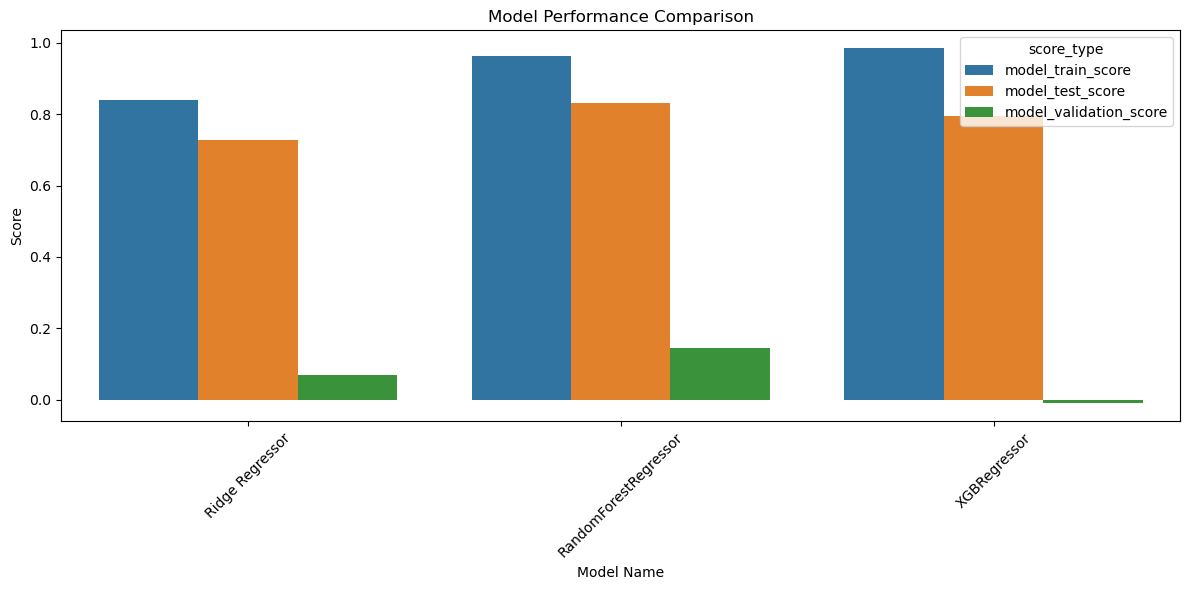

In [54]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='score', hue='score_type', data=df_melted)

plt.title('Model Performance Comparison')
plt.xlabel('Model Name')
plt.ylabel('Score')

# Rotate x-axis labels if they're too long
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()


plt.show()

In [55]:
feature_importance = rfmodel.feature_importances_

# map feature importance to features
feature_names = list(X.columns)
feature_importance_map = dict(zip(feature_names, feature_importance))

feature_importance_map

{'case': np.float64(0.2371993450247214),
 'site': np.float64(0.1422352540581017),
 'age': np.float64(0.01450052812593017),
 'skullw': np.float64(0.051153653579519974),
 'totlngth': np.float64(0.06803651380154879),
 'taill': np.float64(0.02885862445580122),
 'hdlngth': np.float64(0.07386381397888798),
 'earconch': np.float64(0.19082355694640926),
 'eye': np.float64(0.022103188721929422),
 'chest': np.float64(0.04128053146327173),
 'belly': np.float64(0.0399992690658541),
 'Pop': np.float64(0.08470845772627585),
 'sex': np.float64(0.005237263051748499)}

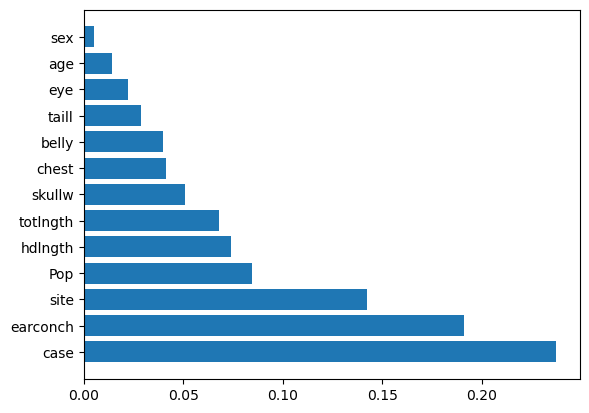

In [56]:
# sort and visualize
sorted_features = sorted(feature_importance_map.items(), key= lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in sorted_features]
top_importance = [feature[1] for feature in sorted_features]

plt.barh(top_features, top_importance)
plt.show()

In [57]:
rf_model_features = pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
rf_model_features = rf_model_features.sort_values(by='Importance', ascending=False)

rf_model_features

,Feature,Importance
0,case,0.237199
1,earconch,0.190824
2,site,0.142235
3,Pop,0.084708
4,hdlngth,0.073864
5,totlngth,0.068037
6,skullw,0.051154
7,chest,0.041281
8,belly,0.039999
9,taill,0.028859


In [58]:
important_features = rf_model_features[rf_model_features['Importance']>0.05]
important_features

,Feature,Importance
0,case,0.237199
1,earconch,0.190824
2,site,0.142235
3,Pop,0.084708
4,hdlngth,0.073864
5,totlngth,0.068037
6,skullw,0.051154


In [59]:
df=final_df.dropna()


In [60]:
# Select the features based on the importance scores
features = ['skullw', 'totlngth', 'hdlngth', 'belly', 'chest', 'eye', 'age']
X = df[features]
y = df['footlgth']

In [61]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (101, 7)
Shape of y: (101,)


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 7)
Shape of y_train: (80,)
Shape of X_test: (21, 7)
Shape of y_test: (21,)


In [63]:
X = df[features].values
y = df['hdlngth'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (101, 7)
Shape of y: (101,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [65]:
#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
finalmodel = RandomForestRegressor(random_state=42, max_features='sqrt')
finalmodel.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [66]:
import numpy as np
new_possum = np.array([[60.4, 89.0,94.1, 36.0, 28.0, 15.2, 8.0]])  # skullw, totlngth, headlgth, belly, chest, eye, age
predicted_footlgth = finalmodel.predict(new_possum)
print(f"Predicted footlgth: {predicted_footlgth[0]:.2f}")


Predicted footlgth: 99.64


In [67]:
from pickle import  dump
import pickle
dump(finalmodel, open('possum.sav', 'wb'))

In [68]:
with open('possum.sav', 'rb') as model_file:
    model = pickle.load(model_file)
model.predict(new_possum)

array([99.636])